In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as sci
from scipy import constants
from scipy.constants import physical_constants as pc
from scipy.integrate import quad
import scipy.optimize as opt
import sigfig as sf

In [4]:
plt.style.use(['science', 'notebook', 'grid'])
tex_fonts = {
    "text.usetex": True,# Use LaTeX to write all text
    "font.family": "serif",
    # # Use 9pt font in plots, to match 9pt caption fontsize in RevTeX
    # "axes.labelsize": 9,
    # "font.size": 9,
    # # Make the legend/label fonts a little smaller
    # "legend.fontsize": 8,
    # "figure.titlesize": 8,
    # "xtick.labelsize": 8,
    # "ytick.labelsize": 8,
    "lines.linewidth": 1,
    "xtick.major.width": 0.5,
    "xtick.minor.width": 0.5,
    "ytick.major.width": 0.5,
    "ytick.minor.width": 0.5,
    "axes.linewidth": 0.5
}
plt.rcParams.update(tex_fonts)

In [16]:
df = pd.read_csv('Shielding.csv', comment='#', header=None)
df.columns = ['Shld', 'DPA', 'rel_unc']
df['DPA'] = 2*df['DPA'] # Devido ao foto que metade dos primários são direcionados diretamente ao blackhole
df['abs_unc'] = df['DPA']*df['rel_unc']

df = df.iloc[11:18]
print(df)

     Shld           DPA   rel_unc       abs_unc
11   20.0  2.492180e-25  0.085639  2.134276e-26
12   40.0  7.205520e-26  0.280216  2.019102e-26
13   60.0  5.104200e-26  0.200081  1.021253e-26
14   80.0  2.651940e-26  0.511581  1.356682e-26
15  100.0  1.146562e-26  0.489014  5.606849e-27


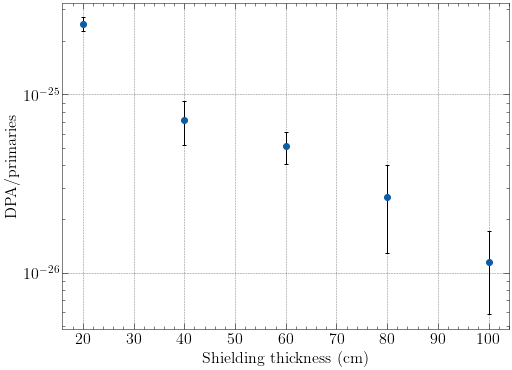

In [17]:
plt.errorbar(df['Shld'],                       # x data
             df['DPA'],                        # y data
             xerr = None,                      # Uncertainty on x values
             yerr = df['abs_unc'],             # Uncertainty on y values
             fmt = 'o',
             ecolor = 'black', 
             capsize = 2
            )
plt.xlabel('Shielding thickness (cm)')
plt.ylabel('DPA/primaries')
#plt.xscale('log')
plt.yscale('log')